In [ ]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import urllib.request as ur
from google.colab import drive
import argparse
drive.mount('/content/gdrive')
from csv import reader
from math import sqrt
from random import seed
from random import randrange 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

seed(13)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# KNN

In [ ]:
# Carregando os dados

data = pd.read_csv('/content/gdrive/My Drive/data/abalone_dataset.csv', sep =";")
data = pd.get_dummies(data) # one hot encoding para dados nominais
data.head()

FileNotFoundError: ignored

In [ ]:
# Distribuição das classes
data[['rings']].groupby('rings')['rings'].count() # Contando a quantidade de classes e suas respectivas quantidades

rings
1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: rings, dtype: int64

## Preparando os dados

In [ ]:
# Dando uma nomenclatura de 0 até 27 para as classes para ficar mais simples 
def score_to_numeric(x):
    if x== 1:
        return 0
    if x== 2:
        return 1
    if x == 3:
        return 2
    if x == 4:
        return 3
    if x== 5:
        return 4
    if x== 6:
        return 5
    if x == 7:
        return 6
    if x == 8:
        return 7
    if x== 9:
        return 8
    if x== 10:
        return 9
    if x == 11:
        return 10
    if x == 12:
        return 11
    if x== 13:
        return 12
    if x== 14:
        return 13
    if x == 15:
        return 14
    if x == 16:
        return 15
    if x == 17:
        return 16
    if x== 18:
        return 17
    if x== 19:
        return 18
    if x == 20:
        return 19
    if x == 21:
        return 20
    if x== 22:
        return 21
    if x== 23:
        return 22
    if x == 24:
        return 23
    if x == 25:
        return 24
    if x== 26:
        return 25
    if x == 27:
        return 26
    if x== 29:
        return 27

# dar labels int de. 0 até 27 para as classes
data['rings'] = data['rings'].apply(score_to_numeric)


# Distribuição das classes
data[['rings']].groupby('rings')['rings'].count()

rings
0       1
1       1
2      15
3      57
4     115
5     259
6     391
7     568
8     689
9     634
10    487
11    267
12    203
13    126
14    103
15     67
16     58
17     42
18     32
19     26
20     14
21      6
22      9
23      2
24      1
25      1
26      2
27      1
Name: rings, dtype: int64

In [ ]:
# Separando onde os dados são únicos para que fiquem obrigatóriamente no treino
apenas_1 = data.loc[(data['rings'] == 24) | (data['rings'] == 25) | (data['rings'] == 26) | (data['rings'] == 27) | (data['rings'] == 1) |( data['rings'] == 0)]	
tudo_com_mais_de_1 = data.loc[(data['rings'] != 24) & (data['rings'] != 25 )& (data['rings'] != 26) & (data['rings'] != 27) & (data['rings'] != 1) & (data['rings'] != 0)]
  

# Dividindo dataset em dados e labels
x = tudo_com_mais_de_1.drop(columns=['rings']).values
y = tudo_com_mais_de_1[['rings']].values # labels

x1 = apenas_1.drop(columns=['rings']).values
y1 = apenas_1[['rings']].values # labels

# treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify= y)

# adicionando os que só possuem 1 caso no treino
x_train = np.concatenate((x_train,x1))
y_train = np.concatenate((y_train,y1))

# Shapes
print(y_train.shape,
x_train.shape)

print(y_test.shape,
x_test.shape)

(3343, 1) (3343, 10)
(834, 1) (834, 10)


In [ ]:
# treinando o modelo knn com n=5
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

# predição
y_pred = classifier.predict(x_test)

print(classification_report(y_test, y_pred))
print("Taxa de Erro:")
print(np.mean(y_pred != y_test))

              precision    recall  f1-score   support

           2       0.25      0.33      0.29         3
           3       0.62      0.45      0.53        11
           4       0.26      0.22      0.24        23
           5       0.31      0.31      0.31        52
           6       0.32      0.41      0.36        78
           7       0.25      0.32      0.28       114
           8       0.22      0.31      0.26       138
           9       0.25      0.28      0.26       127
          10       0.22      0.21      0.21        97
          11       0.15      0.09      0.11        54
          12       0.00      0.00      0.00        41
          13       0.11      0.04      0.06        25
          14       0.00      0.00      0.00        21
          15       0.00      0.00      0.00        13
          16       0.00      0.00      0.00        12
          17       0.00      0.00      0.00         8
          18       0.00      0.00      0.00         6
          19       0.00    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was

Text(0, 0.5, 'Mean Error')

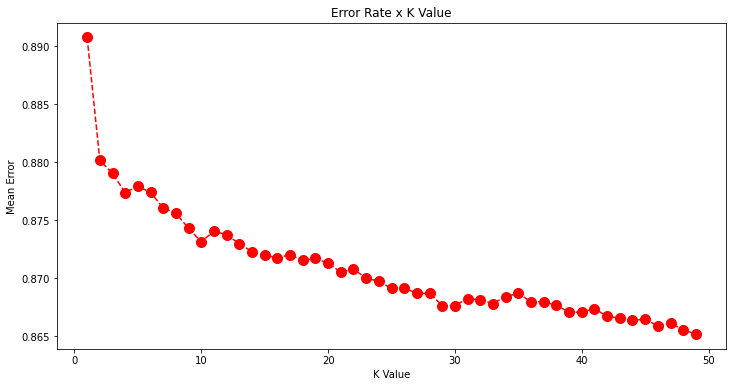

In [ ]:
# Calculando erro para n entre 1 e 50
error = []

for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate x K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
# treinando com n = 50

# treinando o modelo knn com n=50
classifier = KNeighborsClassifier(n_neighbors=50)
classifier.fit(x_train, y_train)
# predição
y_pred = classifier.predict(x_test)
print(classification_report(y_test, y_pred))

print("Taxa de Erro:")
print(np.mean(y_pred != y_test))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         3
           3       0.60      0.27      0.37        11
           4       0.30      0.30      0.30        23
           5       0.32      0.15      0.21        52
           6       0.31      0.33      0.32        78
           7       0.34      0.45      0.39       114
           8       0.25      0.46      0.33       138
           9       0.24      0.37      0.29       127
          10       0.29      0.25      0.27        97
          11       0.00      0.00      0.00        54
          12       0.29      0.05      0.08        41
          13       0.00      0.00      0.00        25
          14       0.00      0.00      0.00        21
          15       0.00      0.00      0.00        13
          16       0.00      0.00      0.00        12
          17       0.00      0.00      0.00         8
          18       0.00      0.00      0.00         6
          19       0.00    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# LVQ

In [ ]:
# train_lvq: trains an lvq system using the given training data and
# corresponding labels. Run the desired number of epochs using the
# given learning rate. Optional validation set to monitor performance.
def train_lvq(data, labels, num_epochs, learning_rate, validation_data=None, validation_labels=None):
    # Get unique class labels.
    num_dims = data.shape[1]
    labels = labels.astype(int)
    unique_labels = np.unique(labels)

    num_protos = len(unique_labels)
    prototypes = np.empty((num_protos, num_dims))
    proto_labels = []

    # Initialize prototypes using class means.
    for i in unique_labels:
        class_data = data[labels[labels == i], :]
        
        
        # Compute class mean.
        mean = np.mean(class_data, axis=0)
        prototypes[i] = mean
        proto_labels.append(i)


    # Loop through data set.
    for epoch in range(0, num_epochs):
        for fvec, lbl in zip(data, labels):
            # Compute distance from each prototype to this point
            distances = list(np.sum(np.subtract(fvec, p)**2) for p in prototypes)
            min_dist_index = distances.index(min(distances))

            # Determine winner prototype.
            winner = prototypes[min_dist_index]
            winner_label = proto_labels[min_dist_index]

            # Push or repel the prototype based on the label.
            if winner_label == lbl:
                sign = 1
            else:
                sign = -1

            # Update winner prototype
            prototypes[min_dist_index] = np.add(prototypes[min_dist_index], np.subtract(fvec, winner) * learning_rate * sign)

        # Use validation set to test performance.
        val_err = 0
        if validation_labels is not None:
            for fvec, lbl in zip(validation_data, validation_labels):
                distances = list(np.sum(np.subtract(fvec, p) ** 2) for p in prototypes)
                min_dist_index = distances.index(min(distances))

                # Determine winner prototype label
                winner_label = proto_labels[min_dist_index]

                # Check if labels match
                if not winner_label == lbl:
                    val_err = val_err + 1

            val_err = val_err / len(validation_labels)
            print("Epoch " + str(epoch) + ". Validation error: " + str(val_err))
        else:
            print("Epoch " + str(epoch))


    return (prototypes, proto_labels)

In [ ]:
# Primeiro LVQ
learning_rate = 0.3
num_epochs = 10

train_lvq(x_train, y_train, num_epochs, learning_rate, validation_data=x_test, validation_labels=y_test)

Epoch 0. Validation error: 0.8345323741007195
Epoch 1. Validation error: 0.9940047961630696
Epoch 2. Validation error: 1.0
Epoch 3. Validation error: 1.0
Epoch 4. Validation error: 0.986810551558753
Epoch 5. Validation error: 0.9376498800959233
Epoch 6. Validation error: 1.0
Epoch 7. Validation error: 0.9964028776978417
Epoch 8. Validation error: 0.935251798561151
Epoch 9. Validation error: 0.9964028776978417


(array([[-3.49220113e+118,  2.20769377e+119, -1.05980141e+119,
         -5.22610646e+119, -1.47625960e+119, -4.27741533e+119,
         -5.90066053e+118, -2.23306072e+119, -1.95790764e+119,
          4.19096836e+119],
        [-3.06612993e+119, -4.13632983e+118, -1.66232108e+119,
          4.25338215e+119, -3.23948746e+119, -2.75077432e+119,
          5.46780231e+119, -1.32833395e+119,  1.38737415e+119,
         -5.90401960e+117],
        [-4.81061572e+118, -3.78272093e+118, -5.80434266e+118,
         -5.30816573e+119, -2.73695573e+119, -1.66946605e+119,
         -1.20310632e+119, -4.05761417e+119, -1.50200484e+119,
          5.55961901e+119],
        [ 4.54742840e+119,  5.69991670e+118, -4.49069753e+117,
         -5.43594208e+119, -1.65817309e+119, -5.32492119e+118,
         -1.54825892e+119, -1.05949801e+119, -2.94822299e+119,
          4.00772100e+119],
        [ 2.86187716e+119, -1.73419370e+119,  1.44880599e+119,
         -4.82026832e+118,  6.14913443e+119,  4.73497691e+119,
      

In [ ]:
for i in range(5,25):
  print("Para epoch = {}".format(i))
  for j in (0.01, 0.05, 0.1, 0.2, 0.3):
    print("Para learning rate = {}".format(j))
    num_epochs = i
    learning_rate = j
    train_lvq(x_train, y_train, num_epochs, learning_rate, validation_data=x_test, validation_labels=y_test)

Para epoch = 5
Para learning rate = 0.01
Epoch 0. Validation error: 0.9304556354916067
Epoch 1. Validation error: 0.9040767386091128
Epoch 2. Validation error: 0.9400479616306955
Epoch 3. Validation error: 0.9316546762589928
Epoch 4. Validation error: 0.882494004796163
Para learning rate = 0.05
Epoch 0. Validation error: 1.0
Epoch 1. Validation error: 1.0
Epoch 2. Validation error: 0.9940047961630696
Epoch 3. Validation error: 0.9064748201438849
Epoch 4. Validation error: 0.9700239808153477
Para learning rate = 0.1
Epoch 0. Validation error: 0.9964028776978417
Epoch 1. Validation error: 0.9904076738609112
Epoch 2. Validation error: 1.0
Epoch 3. Validation error: 0.8477218225419664
Epoch 4. Validation error: 0.9748201438848921
Para learning rate = 0.2
Epoch 0. Validation error: 1.0
Epoch 1. Validation error: 0.9904076738609112
Epoch 2. Validation error: 1.0
Epoch 3. Validation error: 0.8836930455635491
Epoch 4. Validation error: 0.935251798561151
Para learning rate = 0.3
Epoch 0. Valida

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: overflow encountered in square


Epoch 12. Validation error: 1.0
Para epoch = 14
Para learning rate = 0.01
Epoch 0. Validation error: 0.9304556354916067
Epoch 1. Validation error: 0.9040767386091128
Epoch 2. Validation error: 0.9400479616306955
Epoch 3. Validation error: 0.9316546762589928
Epoch 4. Validation error: 0.882494004796163
Epoch 5. Validation error: 0.9712230215827338
Epoch 6. Validation error: 0.9688249400479616
Epoch 7. Validation error: 1.0
Epoch 8. Validation error: 0.9748201438848921
Epoch 9. Validation error: 0.9364508393285371
Epoch 10. Validation error: 0.9964028776978417
Epoch 11. Validation error: 1.0
Epoch 12. Validation error: 1.0
Epoch 13. Validation error: 0.9904076738609112
Para learning rate = 0.05
Epoch 0. Validation error: 1.0
Epoch 1. Validation error: 1.0
Epoch 2. Validation error: 0.9940047961630696
Epoch 3. Validation error: 0.9064748201438849
Epoch 4. Validation error: 0.9700239808153477
Epoch 5. Validation error: 0.9904076738609112
Epoch 6. Validation error: 0.9844124700239808
Epoch 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in add
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in add


Epoch 0. Validation error: 0.9304556354916067
Epoch 1. Validation error: 0.9040767386091128
Epoch 2. Validation error: 0.9400479616306955
Epoch 3. Validation error: 0.9316546762589928
Epoch 4. Validation error: 0.882494004796163
Epoch 5. Validation error: 0.9712230215827338
Epoch 6. Validation error: 0.9688249400479616
Epoch 7. Validation error: 1.0
Epoch 8. Validation error: 0.9748201438848921
Epoch 9. Validation error: 0.9364508393285371
Epoch 10. Validation error: 0.9964028776978417
Epoch 11. Validation error: 1.0
Epoch 12. Validation error: 1.0
Epoch 13. Validation error: 0.9904076738609112
Epoch 14. Validation error: 0.9904076738609112
Para learning rate = 0.05
Epoch 0. Validation error: 1.0
Epoch 1. Validation error: 1.0
Epoch 2. Validation error: 0.9940047961630696
Epoch 3. Validation error: 0.9064748201438849
Epoch 4. Validation error: 0.9700239808153477
Epoch 5. Validation error: 0.9904076738609112
Epoch 6. Validation error: 0.9844124700239808
Epoch 7. Validation error: 0.8633

In [ ]:
num_epochs = 7
learning_rate = 0.2
train_lvq(x_train, y_train, num_epochs, learning_rate, validation_data=x_test, validation_labels=y_test)

# Taxa de erro converge para 0.83

Epoch 0. Validation error: 1.0
Epoch 1. Validation error: 0.9904076738609112
Epoch 2. Validation error: 1.0
Epoch 3. Validation error: 0.8836930455635491
Epoch 4. Validation error: 0.935251798561151
Epoch 5. Validation error: 0.9928057553956835
Epoch 6. Validation error: 0.8345323741007195


(array([[ 1.39811194e+57,  5.78118102e+57, -2.55873955e+57,
         -2.21068709e+58, -3.56438416e+57, -1.01423818e+58,
         -2.88438979e+57, -8.40430588e+57, -5.86605349e+57,
          1.42703594e+58],
        [-1.08319404e+58, -1.50863160e+57, -6.82985230e+57,
          1.40594512e+58, -1.19967248e+58, -9.82218238e+57,
          1.91222433e+58, -1.75571390e+57,  1.88641874e+57,
         -1.30704841e+56],
        [-1.88255922e+57, -1.95347147e+57, -2.08730701e+57,
         -1.85615090e+58, -8.69119513e+57, -5.26531424e+57,
         -4.03429979e+57, -1.01459699e+58, -1.01438076e+58,
          2.02897776e+58],
        [ 4.61557298e+57, -4.23617400e+56, -5.42967179e+56,
         -1.98854453e+58, -1.21513221e+58, -3.09398616e+57,
         -2.73521708e+57, -8.71608858e+57, -6.80102840e+57,
          1.55171170e+58],
        [ 1.67280695e+58,  1.34088778e+57,  7.60289312e+57,
          2.90437640e+56,  1.29520230e+58,  1.66786927e+58,
         -1.10413830e+58, -1.27129243e+57,  2.237147